# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

In [10]:
#Load .env environment variables
load_dotenv()

True

In [11]:
# Read your api key environment variable and create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [12]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language = "en", page_size=100, sort_by="relevancy")

In [13]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language = "en", page_size=100, sort_by="relevancy")

In [14]:
# Create the Bitcoin sentiment scores DataFrame
bc_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound =  sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        bc_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    
    except AttributeError:
        pass

bc_df = pd.DataFrame(bc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bc_df = bc_df[cols]

bc_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [15]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article['content']
        date = article['publishedAt'][:10]
        sentiment = analyzer.polarity_scores(text)
        compound =  sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        eth_sentiments.append({
            'text': text,
            'date': date,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'neutral': neu
        })
    
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
3,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


In [16]:
# Describe the Bitcoin Sentiment
bc_df.describe()

,compound,positive,negative,neutral
count,98.000000,98.000000,98.000000,98.000000
mean,0.148101,0.054806,0.020847,0.924357
std,0.333217,0.060568,0.053264,0.079441
min,-0.946800,0.000000,0.000000,0.637000
25%,0.000000,0.000000,0.000000,0.858500
50%,0.000000,0.050000,0.000000,0.948000
75%,0.416600,0.117000,0.000000,1.000000
max,0.811800,0.198000,0.363000,1.000000


In [17]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.223294,0.075629,0.021722,0.902660
std,0.360931,0.077265,0.045489,0.087585
min,-0.670500,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.849000
50%,0.214400,0.074000,0.000000,0.912000
75%,0.510600,0.132000,0.000000,1.000000
max,0.883400,0.347000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest positive mean (.075 vs .054)

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum again had the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [19]:
# Expand the default stopwords list if necessary
sw_addons = {'chars','volod','youve','youll','mal','la','come', 'unless', 'youre', 'bringing', 'u', 'absolutely', 'roug','amp', 'file', 'photo', 'reuters','staff', 'char', 'ruvic', 'bitcoin','ethereum','representation','ruvicillustration','tim','saikat','chatterjee','btcbtsp','n','reutersdado',']','['}

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    word_tokenized = [word_tokenize(i) for i in text]
    sw = set(stopwords.words('english'))
    regex= re.compile("[^a-zA-z ]")
    re_clean = [[regex.sub('',word).lower() for word in sent] for sent in word_tokenized]
    
    lem = [[lemmatizer.lemmatize(word) for word in sent if word not in sw.union(sw_addons)] for sent in re_clean]
    token = [[word for word in sent if word != ''] for sent in lem]
    return token

In [21]:
# Create a new tokens column for bitcoin
bc_token = tokenizer(bc_df.text)
bc_df['tokens'] = bc_token

In [22]:
bc_df = bc_df[['compound','positive','negative','neutral','text','tokens']]
bc_df.head()

,compound,positive,negative,neutral,text,tokens
0,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
2,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...,"[paypal, newlyannounced, support, cryptocurren..."
3,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, massive, twomonth, rally, passed, f..."
4,0.0000,0.000,0.000,1.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [23]:
# Create a new tokens column for ethereum
eth_token = tokenizer(eth_df.text)
eth_df['tokens'] = eth_token
eth_df = eth_df[['compound','positive','negative','neutral','text','tokens']]
eth_df.head()

,compound,positive,negative,neutral,text,tokens
0,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...,"[paypal, newlyannounced, support, cryptocurren..."
1,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[virtual, currency, standing, pc, motherboard,..."
2,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[virtual, currency, standing, pc, motherboard,..."
3,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, xrp, soared, monda..."
4,0.1779,0.052,0.0,0.948,NEW YORK (Reuters) - Institutional investors p...,"[new, york, institutional, investor, pumped, m..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [48]:
from collections import Counter
from nltk import ngrams

In [110]:
# Generate the Bitcoin N-grams where N=2
bc_string = np.concatenate([np.ravel(bag) for bag in bc_df.tokens])
bc_bigrams = ngrams(bc_string, n= 2)

# uncomment if want to see raw bigrams
#bc_bigrams = list(dict(bc_bigrams).items())

In [111]:
# Generate the Ethereum N-grams where N=2
eth_string = np.concatenate([np.ravel(bag) for bag in eth_df.tokens])
eth_bigrams = ngrams(eth_string, n= 2)

# uncomment if want to see raw bigrams
#eth_bigrams = list(dict(bc_bigrams).items())

In [112]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    top_N = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(top_N.items()), columns = ['ngram', 'frequency'])


In [113]:
# Get the top 10 words for Bitcoin
token_count(bc_string, 10)

,ngram,frequency
0,currency,39
1,virtual,33
2,taken,31
3,illustration,27
4,seen,26
5,london,26
6,cryptocurrency,22
7,investor,18
8,new,18
9,high,18


In [114]:
# Get the top 10 words for Ethereum
token_count(eth_string, 10)

,ngram,frequency
0,cryptocurrency,19
1,blockchain,16
2,new,15
3,li,15
4,currency,13
5,week,13
6,asset,13
7,price,13
8,first,11
9,virtual,10


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [32]:
import numpy as np
btc_bag = np.concatenate([np.ravel(bag) for bag in bc_df.tokens])
btc_input= ' '.join(btc_bag)

<class 'str'>


In [25]:
# Generate the Bitcoin word cloud
def word_cloud(text, title =""):
    df_cloud = WordCloud(width=500, colormap = 'RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict= fontdict)
    plt.show()

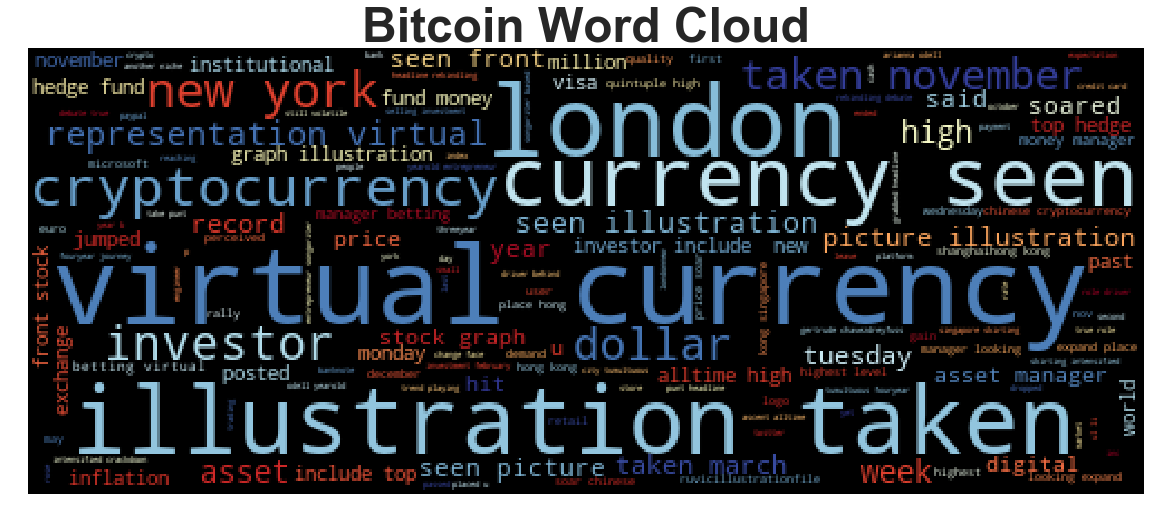

In [45]:
word_cloud(btc_input, title="Bitcoin Word Cloud")

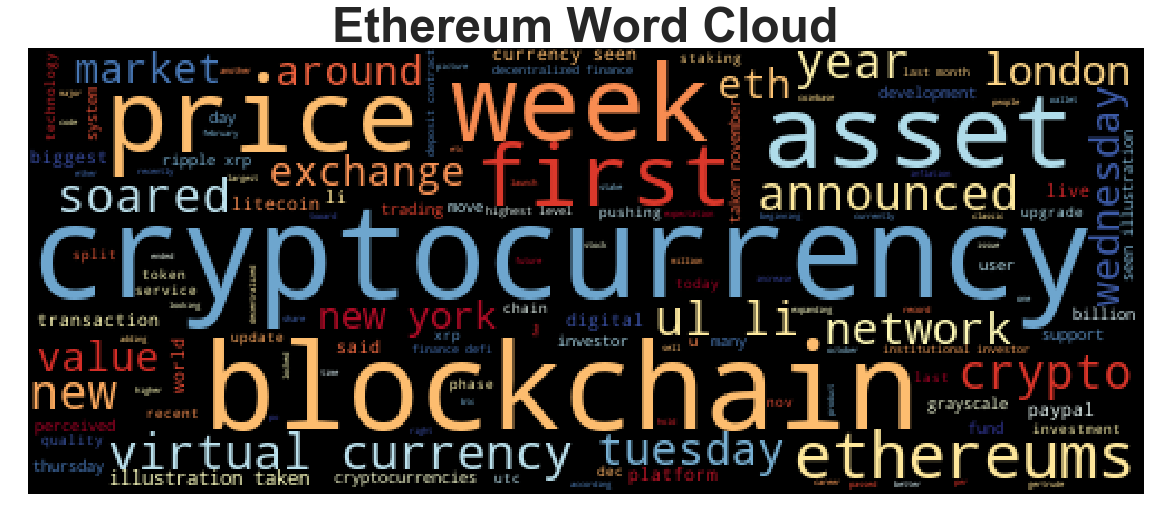

In [46]:
# Generate the Ethereum word cloud
eth_bag = np.concatenate([np.ravel(bag) for bag in eth_df.tokens])
eth_input = ' '.join(eth_bag)

word_cloud(eth_input, title = 'Ethereum Word Cloud')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [115]:
import spacy
from spacy import displacy

In [116]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [117]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [163]:
# Concatenate all of the bitcoin text together and render image
bc_corpus = ' '.join(btc_bag)
doc = nlp(bc_corpus)
displacy.render(doc, style = 'ent')



In [164]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

microsoft ORG
ukraine GPE
nine year DATE
million CARDINAL
microsoft ORG
visa ORG
cryptocurrency ORG
first ORDINAL
first ORDINAL
october DATE
november DATE
first ORDINAL
next day DATE
central bank ORG
digital yuan ORG
past week DATE
six year DATE
million CARDINAL
november DATE
today DATE
november DATE
monthly DATE
april fourthbest month DATE
williams PERSON
arya stark PERSON
lady catelyn lord PERSON
eddard acolyte PERSON
monday DATE
microsoft ORG
ukraine GPE
nine year DATE
million CARDINAL
microsoft ORG
tuesday DATE
evening TIME
december DATE
prior week DATE
tom wilson PERSON
chavez justin PERSON
bbc news ORG
november DATE
tokyo GPE
london GPE
london GPE
february DATE
london GPE
london digital ORG
monday DATE
february DATE
london GPE
november DATE
tokyo GPE
londonnew york GPE
london GPE
november DATE
jack dorsey PERSON
october DATE
november DATE
new york GPE
november DATE
new york GPE
london GPE
november DATE
november DATE
november DATE
november DATE
london GPE
tuesday DATE
first ORDINA

---

## Ethereum NER

In [165]:
eth_corpus = ' '.join(eth_df.text)
eth_doc = nlp(eth_corpus)
displacy.render(eth_doc, style = 'ent')

In [166]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Hala Systems ORG
Hedera ORG